In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
svc = SVC()
knn = KNeighborsClassifier()
lr = LogisticRegression()
voting_model = VotingClassifier(estimators=[('knn',knn),('lr',lr),('svc',svc)], voting='soft')

In [20]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
titanic = sns.load_dataset('titanic')
titanic.drop(['class', 'alive', 'embark_town', 'who', 'adult_male', 'alone'], axis=1, inplace=True)
titanic['family'] = titanic.sibsp + titanic.parch
titanic.drop(['sibsp', 'parch'], axis=1, inplace=True)
df1 = titanic.copy()
df1.embarked.fillna(value='S', inplace=True)
age_md = df1.groupby(['pclass', 'sex']).age.agg(['median'])
m1_med = df1.loc[(df1.pclass == 1) & (df1.sex == 'male'), 'age'].median()
m2_med = df1.loc[(df1.pclass == 2) & (df1.sex == 'male'), 'age'].median()
m3_med = df1.loc[(df1.pclass == 3) & (df1.sex == 'male'), 'age'].median()
f1_med = df1.loc[(df1.pclass == 1) & (df1.sex == 'female'), 'age'].median()
f2_med = df1.loc[(df1.pclass == 2) & (df1.sex == 'female'), 'age'].median()
f3_med = df1.loc[(df1.pclass == 3) & (df1.sex == 'female'), 'age'].median()
df1.loc[(df1.pclass == 1) & (df1.sex == 'male'), 'age'].fillna(m1_med, inplace=True)
df1.loc[(df1.pclass == 1) & (df1.sex == 'male')&(df1.age.isna()), 'age'] = m1_med
df1.loc[(df1.pclass == 2) & (df1.sex == 'male')&(df1.age.isna()), 'age'] = m2_med
df1.loc[(df1.pclass == 3) & (df1.sex == 'male')&(df1.age.isna()), 'age'] = m3_med
df1.loc[(df1.pclass == 1) & (df1.sex == 'female')&(df1.age.isna()), 'age'] = f1_med
df1.loc[(df1.pclass == 2) & (df1.sex == 'female')&(df1.age.isna()), 'age'] = f2_med
df1.loc[(df1.pclass == 3) & (df1.sex == 'female')&(df1.age.isna()), 'age'] = f3_med
df1.drop('deck', axis=1, inplace=True)
df1.age_new = 0
df1.loc[df1.age >= 50, 'age_new'] = 'old'
df1.loc[(df1.age < 50) & (df1.age >= 10), 'age_new'] = 'young'
df1.loc[df1.age < 10, 'age_new'] = 'baby'
for i in ['sex', 'embarked', 'age_new']:
    globals()[f'df1_{i}_encoder'] = LabelEncoder()
    globals()[f'df1_{i}_encoder'].fit(df1[i])
    df1[i] = globals()[f'df1_{i}_encoder'].transform(df1[i])
print(df1_sex_encoder.classes_)
print(df1_embarked_encoder.classes_)
print(df1_age_new_encoder.classes_)
df1.drop('embarked', axis=1, inplace=True)
X = df1.drop('survived', axis=1)
y = df1.survived
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=19)

['female' 'male']
['C' 'Q' 'S']
['baby' 'old' 'young']


In [22]:
X

,pclass,sex,age,fare,family,age_new
0,3,1,22.0,7.2500,1,2
1,1,0,38.0,71.2833,1,2
2,3,0,26.0,7.9250,0,2
3,1,0,35.0,53.1000,1,2
4,3,1,35.0,8.0500,0,2
...,...,...,...,...,...,...
886,2,1,27.0,13.0000,0,2
887,1,0,19.0,30.0000,0,2
888,3,0,21.5,23.4500,3,2
889,1,1,26.0,30.0000,0,2


,pclass,sex,age,fare,family,age_new
0,3,1,34.5,7.8292,0,2
1,3,0,47.0,7.0000,1,2
2,2,1,62.0,9.6875,0,1
3,3,1,27.0,8.6625,0,2
4,3,0,22.0,12.2875,2,2
...,...,...,...,...,...,...
413,3,1,24.0,8.0500,0,2
414,1,0,39.0,108.9000,0,2
415,3,1,38.5,7.2500,0,2
416,3,1,24.0,8.0500,0,2


In [19]:
df1.head(3)

,survived,pclass,sex,age,fare,embarked,family,age_new
0,0,3,1,22.0,7.2500,2,1,2
1,1,1,0,38.0,71.2833,0,1,2
2,1,3,0,26.0,7.9250,2,0,2


In [24]:
#테스트 파일 전처리
test = pd.read_csv('./test.csv')
test['family'] = test.SibSp + test.Parch
test.drop(['SibSp', 'Parch'], axis=1, inplace=True)
test.drop(['Cabin'], axis=1, inplace=True)
test.drop(['Name', 'Ticket', 'PassengerId'], axis=1, inplace=True)
test.Fare.fillna(value=test[(test.family == 0)&(test.Pclass == 3)].Fare.mean(), inplace=True)
test_age_md = test.groupby(['Pclass', 'Sex']).Age.agg(['median'])
m1_med = test.loc[(test.Pclass == 1) & (test.Sex == 'male'), 'Age'].median()
m2_med = test.loc[(test.Pclass == 2) & (test.Sex == 'male'), 'Age'].median()
m3_med = test.loc[(test.Pclass == 3) & (test.Sex == 'male'), 'Age'].median()
f1_med = test.loc[(test.Pclass == 1) & (test.Sex == 'female'), 'Age'].median()
f2_med = test.loc[(test.Pclass == 2) & (test.Sex == 'female'), 'Age'].median()
f3_med = test.loc[(test.Pclass == 3) & (test.Sex == 'female'), 'Age'].median()
test.loc[(test.Pclass == 1) & (test.Sex == 'male'), 'Age'].fillna(m1_med, inplace=True)
test.loc[(test.Pclass == 1) & (test.Sex == 'male')&(test.Age.isna()), 'Age'] = m1_med
test.loc[(test.Pclass == 2) & (test.Sex == 'male')&(test.Age.isna()), 'Age'] = m2_med
test.loc[(test.Pclass == 3) & (test.Sex == 'male')&(test.Age.isna()), 'Age'] = m3_med
test.loc[(test.Pclass == 1) & (test.Sex == 'female')&(test.Age.isna()), 'Age'] = f1_med
test.loc[(test.Pclass == 2) & (test.Sex == 'female')&(test.Age.isna()), 'Age'] = f2_med
test.loc[(test.Pclass == 3) & (test.Sex == 'female')&(test.Age.isna()), 'Age'] = f3_med
test.loc[test.Age >= 50, 'age_new'] = 'old'
test.loc[(test.Age < 50) & (test.Age >= 10), 'age_new'] = 'young'
test.loc[test.Age < 10, 'age_new'] = 'baby'
test.rename(columns={'Pclass':'pclass','Sex':'sex','Age':'age', 'Fare':'fare', 'Embarked':'embarked'}, inplace=True)
from sklearn.preprocessing import LabelEncoder

for i in ['sex', 'embarked', 'age_new']:
    globals()[f'new_test_{i}_encoder'] = LabelEncoder()
    globals()[f'new_test_{i}_encoder'].fit(test[i])
    test[i] = globals()[f'new_test_{i}_encoder'].transform(test[i])
test.drop('embarked', axis=1, inplace=True)
test

,pclass,sex,age,fare,family,age_new
0,3,1,34.5,7.8292,0,2
1,3,0,47.0,7.0000,1,2
2,2,1,62.0,9.6875,0,1
3,3,1,27.0,8.6625,0,2
4,3,0,22.0,12.2875,2,2
...,...,...,...,...,...,...
413,3,1,24.0,8.0500,0,2
414,1,0,39.0,108.9000,0,2
415,3,1,38.5,7.2500,0,2
416,3,1,24.0,8.0500,0,2


In [31]:
knn.fit(X_train,y_train)
knn.predict(X_test)

array([0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1])

In [28]:
pred = knn.predict(test)

In [3]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, roc_auc_score

In [4]:
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,ExtraTreesClassifier

In [106]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

logistic_regression = LogisticRegression()
knn = KNeighborsClassifier(n_neighbors=10)
voting_model = VotingClassifier(estimators=[ ('LogisticRegression', logistic_regression),
                                            ('KNN', knn) ], voting='soft')

classifiers = [logistic_regression, knn]
for classifier in classifiers:
    classifier.fit(X_train, y_train)
    pred = classifier.predict(X_test)
    class_name = classifier.__class__.__name__
    print('{0} 정확도: {1:.4f}'.format(class_name, accuracy_score(y_test, pred)))
voting_model.fit(X_train, y_train)
pred = voting_model.predict(X_test)
print('보팅 분류기의 정확도: {0: .4f}'.format(accuracy_score(y_test, pred)))

LogisticRegression 정확도: 0.8000
KNeighborsClassifier 정확도: 0.7333
보팅 분류기의 정확도:  0.8222


In [45]:
classifiers = [logistic_regression, knn]
for classifier in classifiers:
    classifier.fit(X_train, y_train)
    pred = classifier.predict(X_test)
    class_name = classifier.__class__.__name__
    print('{0} 정확도: {1:.4f}'.format(class_name, accuracy_score(y_test, pred)))
voting_model.fit(X, y)
pred = voting_model.predict(test)

LogisticRegression 정확도: 0.8000
KNeighborsClassifier 정확도: 0.7111


In [69]:
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,ExtraTreesClassifier
ran_clf = RandomForestClassifier(n_estimators=400, max_depth=5)
ran_clf.fit(X_train, y_train)
pred = ran_clf.predict(X_test)
accuracy_score(y_test, pred)

0.8333333333333334

In [70]:
ran_clf.fit(X, y)
pred = ran_clf.predict(test)

In [71]:
tit = pd.read_csv('test.csv')                          
tit.drop(list(tit.columns)[1:], axis = 1, inplace=True) 
tit['Survived'] = pred
tit.set_index('PassengerId', inplace=True)
tit.to_csv('tit_test(3).csv')

In [72]:
bag_clf = BaggingClassifier()

In [89]:
bag_clf = BaggingClassifier(n_estimators=200)
bag_clf.fit(X_train, y_train)
pred = ran_clf.predict(X_test)
accuracy_score(y_test, pred)

0.8444444444444444

In [95]:
bag_clf = BaggingClassifier()
bag_clf.fit(X, y)
pred1 = ran_clf.predict(test)

In [96]:
tit = pd.read_csv('test.csv')                          
tit.drop(list(tit.columns)[1:], axis = 1, inplace=True) 
tit['Survived'] = pred1
tit.set_index('PassengerId', inplace=True)
tit.to_csv('tit_test(5).csv')

,pclass,sex,age,fare,family,age_new
0,3,1,22.0,7.2500,1,2
1,1,0,38.0,71.2833,1,2
2,3,0,26.0,7.9250,0,2
3,1,0,35.0,53.1000,1,2
4,3,1,35.0,8.0500,0,2
...,...,...,...,...,...,...
886,2,1,27.0,13.0000,0,2
887,1,0,19.0,30.0000,0,2
888,3,0,21.5,23.4500,3,2
889,1,1,26.0,30.0000,0,2


In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

logistic_regression = LogisticRegression()
knn = KNeighborsClassifier(n_neighbors=10)
voting_model = VotingClassifier(estimators=[ ('LogisticRegression', logistic_regression),
                                            ('KNN', knn) ], voting='soft')

classifiers = [logistic_regression, knn]
for classifier in classifiers:
    classifier.fit(X_train, y_train)
    pred = classifier.predict(X_test)
    class_name = classifier.__class__.__name__
    print('{0} 정확도: {1:.4f}'.format(class_name, accuracy_score(y_test, pred)))
voting_model.fit(X_train, y_train)
pred_vm = voting_model.predict(X_test)
print('보팅 분류기의 정확도: {0: .4f}'.format(accuracy_score(y_test, pred_vm)))

LogisticRegression 정확도: 0.8778
KNeighborsClassifier 정확도: 0.7111
보팅 분류기의 정확도:  0.8222


In [111]:
voting_model.fit(X,y)
pred_vm = voting_model.predict(test)

In [112]:
tit = pd.read_csv('test.csv')                          
tit.drop(list(tit.columns)[1:], axis = 1, inplace=True) 
tit['Survived'] = pred_vm
tit.set_index('PassengerId', inplace=True)
tit.to_csv('tit_test(6).csv')

In [152]:
svc = SVC(C=1.0, degree=1, kernel='linear')
svc.fit(X_train, y_train)
pred_svc = svc.predict(X_test)
accuracy_score(y_test, pred_svc)

0.7777777777777778

In [154]:
svc.fit(X, y)
pred_svc = svc.predict(test)
tit = pd.read_csv('test.csv')                          
tit.drop(list(tit.columns)[1:], axis = 1, inplace=True) 
tit['Survived'] = pred_svc
tit.set_index('PassengerId', inplace=True)
tit.to_csv('tit_test(7).csv')

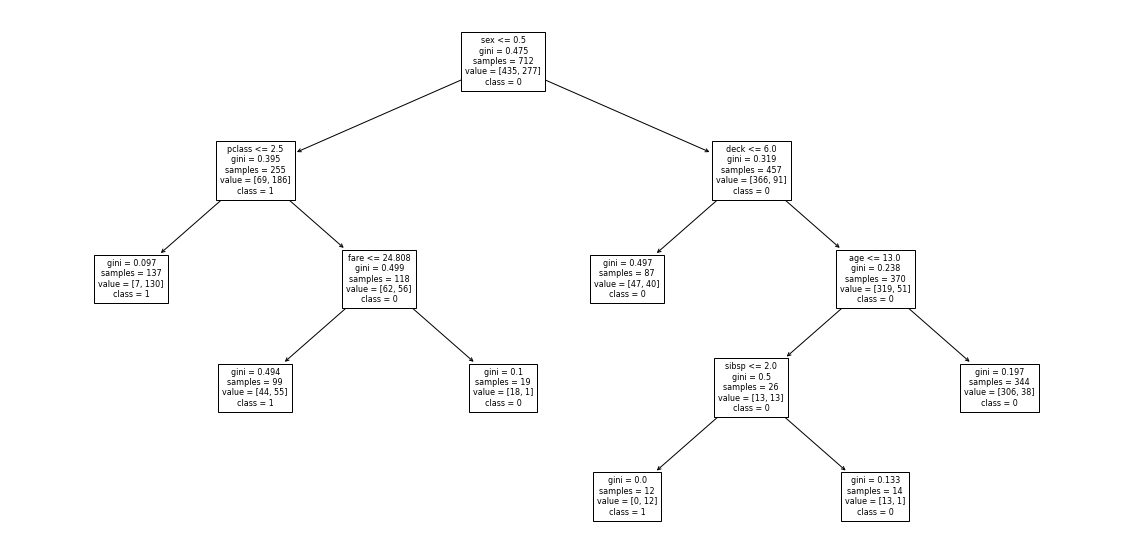

accuracy :  [0.72, 0.78, 0.78, 0.79, 0.81, 0.81, 0.82, 0.75, 0.75, 0.64]
f1_score :  [0.67, 0.71, 0.71, 0.71, 0.7, 0.7, 0.7, 0.53, 0.52, 0.0]
auc score :  [0.73, 0.77, 0.77, 0.77, 0.76, 0.76, 0.77, 0.67, 0.67, 0.5]


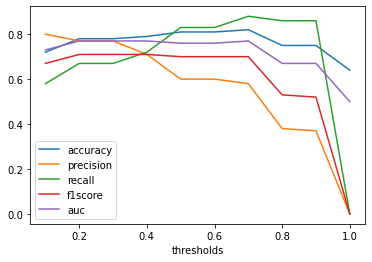

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.preprocessing import Binarizer
import warnings
warnings.filterwarnings('ignore')

df = sns.load_dataset('titanic')
df.drop(['class', 'alive', 'embark_town', 'who', 'adult_male', 'alone'], axis=1, inplace=True)
df1 = df.copy()
df1.deck = df1.deck.astype('O')
# 결측치 처리
df1.embarked.fillna('S', inplace=True)
df1.age.fillna(df1.age.mean(), inplace=True)
df1.deck.fillna('N', inplace=True)
def label_encoding(df):
    ecs = df.columns[(df.dtypes=='O')|(df.dtypes=='category')|(df.dtypes=='bool')]
    for i in ecs:
        globals()[f'{df}_{i}_encoder'] = LabelEncoder()
        globals()[f'{df}_{i}_encoder'].fit(df[i])
        df[i] = globals()[f'{df}_{i}_encoder'].transform(df[i])
label_encoding(df1)
X = df1.drop('survived', axis=1)
y = df1.survived
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy  = accuracy_score(y_test, pred)
    recall    = recall_score(y_test, pred)
    precision = precision_score(y_test, pred)
    f1score   = f1_score(y_test, pred)
    auc = roc_auc_score(y_test,pred)
    return accuracy, recall, precision, f1score, auc
dtclf = DecisionTreeClassifier(ccp_alpha=0.01)
dtclf.fit(X_train, y_train)
pred = dtclf.predict(X_test)
get_clf_eval(y_test, pred)
plt.figure(figsize=(20,10))
plot_tree(dtclf, class_names=['0', '1'],
          feature_names=X_train.columns, fontsize=8)
plt.show()

def get_eval_by_threshold(y_test, pred_proba, thresholds):
    ts_accuracy = []
    ts_precision = []
    ts_recall = []
    ts_f1score = []
    ts_auc = []
    ts_datas = {}
    for custom_threshold in thresholds:
        tt_binarizer = Binarizer(threshold=custom_threshold * 0.1)
        custom_predict = tt_binarizer.fit_transform(pred_proba)[:, 1]
        result = get_clf_eval(y_test, custom_predict)
        ts_accuracy.append(round(result[0],2))
        ts_precision.append(round(result[1],2))
        ts_recall.append(round(result[2],2))
        ts_f1score.append(round(result[3],2))
        ts_auc.append(round(result[4],2))
        
    ts_datas['thresholds'] = [i * 0.1 for i in thresholds]
    ts_datas['accuracy'] = ts_accuracy
    ts_datas['precision'] = ts_precision
    ts_datas['recall'] = ts_recall
    ts_datas['f1score'] = ts_f1score
    ts_datas['auc'] = ts_auc
    print('accuracy : ',ts_accuracy)
    print('f1_score : ',ts_f1score)
    print('auc score : ',ts_auc)
    pd.DataFrame(ts_datas).set_index('thresholds').plot()
    plt.show()
    
dtclf = DecisionTreeClassifier(max_depth=6)
dtclf.fit(X_train, y_train)
pred_proba = dtclf.predict_proba(X_test)
thresholds = range(1, 11)
get_eval_by_threshold(y_test, pred_proba, thresholds)

In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,ExtraTreesClassifier

In [155]:
svc = SVC(C=1.0, degree=1, kernel='linear')
svc.fit(X_train, y_train)
pred_svc = svc.predict(X_test)
accuracy_score(y_test, pred_svc)

0.7777777777777778

In [294]:
bag_clf = BaggingClassifier(n_estimators=300)
bag_clf.fit(X_train, y_train)
pred_bag = ran_clf.predict(X_test)
accuracy_score(y_test, pred_bag)

0.8222222222222222

In [295]:
ran_clf = RandomForestClassifier(n_estimators=300, max_depth=5, min_samples_split=5, min_samples_leaf=1, )
ran_clf.fit(X_train, y_train)
pred_ran = ran_clf.predict(X_test)
accuracy_score(y_test, pred_ran)

0.8222222222222222

In [298]:
ext_clf = ExtraTreesClassifier(n_estimators=300, min_samples_split=10)
ext_clf.fit(X_train, y_train)
pred_ext = ext_clf.predict(X_test)
accuracy_score(y_test, pred_ext)

0.8333333333333334

In [212]:
knn = KNeighborsClassifier(n_neighbors=9, )
knn.fit(X_train, y_train)
pred_knn = knn.predict(X_test)
accuracy_score(y_test, pred_knn)

0.7555555555555555

In [244]:
log = LogisticRegression(
    solver='newton-cg',
    max_iter=100,)
log.fit(X_train, y_train)
pred_log = log.predict(X_test)
accuracy_score(y_test, pred_log)

0.8

In [ ]:
pd.DataFrame({'pred_svc' : accuracy_score(y_test, pred_svc), 
              'pred_bag':accuracy_score(y_test, pred_bag),
              'pred_ran':accuracy_score(y_test, pred_ran),
              'pred_ext':accuracy_score(y_test, pred_ext),
              'pred_knn':accuracy_score(y_test, pred_knn),
              'pred_log':accuracy_score(y_test, pred_log)},)

In [263]:
pred_df = pd.DataFrame([accuracy_score(y_test, pred_svc), 
              accuracy_score(y_test, pred_bag),
              accuracy_score(y_test, pred_ran),
              accuracy_score(y_test, pred_ext),
              accuracy_score(y_test, pred_knn),
              accuracy_score(y_test, pred_log)],index=('pred_svc','pred_bag','pred_ran','pred_ext','pred_knn','pred_log') )

In [267]:
pred_df1= pred_df.T

In [270]:
pred_df.describe()

,0
count,6.000000
mean,0.805556
std,0.033518
min,0.755556
25%,0.783333
50%,0.816667
75%,0.833333
max,0.833333


In [271]:
pred_df1.describe()

,pred_svc,pred_bag,pred_ran,pred_ext,pred_knn,pred_log
count,1.000000,1.000000,1.000000,1.000000,1.000000,1.0
mean,0.777778,0.833333,0.833333,0.833333,0.755556,0.8
std,NaN,NaN,NaN,NaN,NaN,NaN
min,0.777778,0.833333,0.833333,0.833333,0.755556,0.8
25%,0.777778,0.833333,0.833333,0.833333,0.755556,0.8
50%,0.777778,0.833333,0.833333,0.833333,0.755556,0.8
75%,0.777778,0.833333,0.833333,0.833333,0.755556,0.8
max,0.777778,0.833333,0.833333,0.833333,0.755556,0.8


In [297]:
ext_clf.fit(X, y)
pred_ext = ext_clf.predict(test)
tit = pd.read_csv('test.csv')
tit.drop(list(tit.columns)[1:], axis = 1, inplace=True) 
tit['Survived'] = pred_ext
tit.set_index('PassengerId', inplace=True)
tit.to_csv('tit_test(8).csv')

In [303]:
from sklearn.ensemble import GradientBoostingClassifier
gb_clf = GradientBoostingClassifier(loss='deviance')
gb_clf.fit(X_train, y_train)
pred_gb = gb_clf.predict(X_test)
accuracy_score(y_test,pred_gb)

0.8222222222222222

In [302]:
from sklearn.ensemble import GradientBoostingClassifier
gb_clf = GradientBoostingClassifier(loss='exponential')
gb_clf.fit(X_train, y_train)
pred_gb = gb_clf.predict(X_test)
accuracy_score(y_test,pred_gb)

0.8

In [331]:
from sklearn.ensemble import GradientBoostingClassifier
gb_clf = GradientBoostingClassifier(loss='deviance', learning_rate=0.1)
gb_clf.fit(X_train, y_train)
pred_gb = gb_clf.predict(X_test)
accuracy_score(y_test,pred_gb)

0.8222222222222222

In [326]:
from sklearn.ensemble import GradientBoostingClassifier
gb_clf = GradientBoostingClassifier(loss='deviance', learning_rate=0.4)
gb_clf.fit(X_train, y_train)
pred_gb = gb_clf.predict(X_test)
accuracy_score(y_test,pred_gb)

0.8222222222222222

In [333]:
from sklearn.ensemble import GradientBoostingClassifier
gb_clf = GradientBoostingClassifier(loss='deviance', learning_rate=0.01)
gb_clf.fit(X_train, y_train)
pred_gb = gb_clf.predict(X_test)
accuracy_score(y_test,pred_gb)

0.8222222222222222

In [343]:
from sklearn.ensemble import GradientBoostingClassifier
gb_clf = GradientBoostingClassifier(loss='deviance', learning_rate=0.1, n_estimators=200)
gb_clf.fit(X_train, y_train)
pred_gb = gb_clf.predict(X_test)
accuracy_score(y_test,pred_gb)

0.8333333333333334

In [628]:
from sklearn.ensemble import GradientBoostingClassifier
gb_clf = GradientBoostingClassifier(loss='deviance', learning_rate=0.1, n_estimators=200, subsample=0.9)
gb_clf.fit(X_train, y_train)
pred_gb = gb_clf.predict(X_test)
accuracy_score(y_test,pred_gb)

0.8444444444444444

In [427]:
from sklearn.ensemble import GradientBoostingClassifier
gb_clf = GradientBoostingClassifier(loss='deviance', learning_rate=0.1, n_estimators=200, subsample=1.0)
gb_clf.fit(X_train, y_train)
pred_gb = gb_clf.predict(X_test)
accuracy_score(y_test,pred_gb)

0.8333333333333334

In [634]:
#loss = 'deviance'
for i in range(100,1001,100):
    print('n_estimators :',i)
    for j in range(1,10):
        print('sub_sample : ',j*0.1)
        for k in range(1,10):
            print('learning_rate :', k*0.1)
            gb_clf = GradientBoostingClassifier(n_estimators=i,subsample=(j*0.1),learning_rate=(k*0.1))
            gb_clf.fit(X_train, y_train)
            pred = gb_clf.predict(X_test)
            print('분류기의 정확도: {0: .4f}'.format(accuracy_score(y_test, pred)))
            %time
            print('-'*50)

n_estimators : 100
sub_sample :  0.1
learning_rate : 0.1
분류기의 정확도:  0.7444
CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 2.86 µs
--------------------------------------------------
learning_rate : 0.2
분류기의 정확도:  0.6778
CPU times: user 1e+03 ns, sys: 1e+03 ns, total: 2 µs
Wall time: 4.29 µs
--------------------------------------------------
learning_rate : 0.30000000000000004
분류기의 정확도:  0.6889
CPU times: user 1e+03 ns, sys: 0 ns, total: 1e+03 ns
Wall time: 2.86 µs
--------------------------------------------------
learning_rate : 0.4
분류기의 정확도:  0.6222
CPU times: user 1e+03 ns, sys: 0 ns, total: 1e+03 ns
Wall time: 1.91 µs
--------------------------------------------------
learning_rate : 0.5
분류기의 정확도:  0.3333
CPU times: user 1e+03 ns, sys: 0 ns, total: 1e+03 ns
Wall time: 1.91 µs
--------------------------------------------------
learning_rate : 0.6000000000000001
분류기의 정확도:  0.5667
CPU times: user 1 µs, sys: 1e+03 ns, total: 2 µs
Wall time: 3.1 µs
------------------------------

분류기의 정확도:  0.7556
CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 3.1 µs
--------------------------------------------------
sub_sample :  0.7000000000000001
learning_rate : 0.1
분류기의 정확도:  0.8222
CPU times: user 1e+03 ns, sys: 0 ns, total: 1e+03 ns
Wall time: 2.86 µs
--------------------------------------------------
learning_rate : 0.2
분류기의 정확도:  0.8333
CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 3.1 µs
--------------------------------------------------
learning_rate : 0.30000000000000004
분류기의 정확도:  0.8222
CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 4.05 µs
--------------------------------------------------
learning_rate : 0.4
분류기의 정확도:  0.8000
CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 3.1 µs
--------------------------------------------------
learning_rate : 0.5
분류기의 정확도:  0.8222
CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.29 µs
--------------------------------------------------
learning_rate : 0.6000000000000001
분류기의 정확도:  0.

분류기의 정확도:  0.7444
CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 3.81 µs
--------------------------------------------------
learning_rate : 0.7000000000000001
분류기의 정확도:  0.6000
CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 2.86 µs
--------------------------------------------------
learning_rate : 0.8
분류기의 정확도:  0.5778
CPU times: user 1e+03 ns, sys: 0 ns, total: 1e+03 ns
Wall time: 4.05 µs
--------------------------------------------------
learning_rate : 0.9
분류기의 정확도:  0.4000
CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.05 µs
--------------------------------------------------
sub_sample :  0.4
learning_rate : 0.1
분류기의 정확도:  0.8333
CPU times: user 1e+03 ns, sys: 0 ns, total: 1e+03 ns
Wall time: 3.1 µs
--------------------------------------------------
learning_rate : 0.2
분류기의 정확도:  0.8222
CPU times: user 1e+03 ns, sys: 0 ns, total: 1e+03 ns
Wall time: 3.1 µs
--------------------------------------------------
learning_rate : 0.30000000000000004
분류기의 정확

분류기의 정확도:  0.8111
CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 3.1 µs
--------------------------------------------------
learning_rate : 0.4
분류기의 정확도:  0.8333
CPU times: user 1e+03 ns, sys: 1 µs, total: 2 µs
Wall time: 2.86 µs
--------------------------------------------------
learning_rate : 0.5
분류기의 정확도:  0.7778
CPU times: user 1e+03 ns, sys: 0 ns, total: 1e+03 ns
Wall time: 2.86 µs
--------------------------------------------------
learning_rate : 0.6000000000000001
분류기의 정확도:  0.8000
CPU times: user 1e+03 ns, sys: 1e+03 ns, total: 2 µs
Wall time: 3.81 µs
--------------------------------------------------
learning_rate : 0.7000000000000001
분류기의 정확도:  0.7889
CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 3.1 µs
--------------------------------------------------
learning_rate : 0.8
분류기의 정확도:  0.7778
CPU times: user 1e+03 ns, sys: 1 µs, total: 2 µs
Wall time: 2.86 µs
--------------------------------------------------
learning_rate : 0.9
분류기의 정확도:  0.7889
CPU times: u

분류기의 정확도:  0.7000
CPU times: user 1e+03 ns, sys: 1e+03 ns, total: 2 µs
Wall time: 3.1 µs
--------------------------------------------------
sub_sample :  0.6000000000000001
learning_rate : 0.1
분류기의 정확도:  0.8222
CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 3.1 µs
--------------------------------------------------
learning_rate : 0.2
분류기의 정확도:  0.7778
CPU times: user 1e+03 ns, sys: 0 ns, total: 1e+03 ns
Wall time: 3.1 µs
--------------------------------------------------
learning_rate : 0.30000000000000004
분류기의 정확도:  0.7778
CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 3.81 µs
--------------------------------------------------
learning_rate : 0.4
분류기의 정확도:  0.7778
CPU times: user 1e+03 ns, sys: 0 ns, total: 1e+03 ns
Wall time: 3.1 µs
--------------------------------------------------
learning_rate : 0.5
분류기의 정확도:  0.8222
CPU times: user 1e+03 ns, sys: 0 ns, total: 1e+03 ns
Wall time: 3.81 µs
--------------------------------------------------
learning_rate : 0.6000000

분류기의 정확도:  0.6111
CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 3.1 µs
--------------------------------------------------
learning_rate : 0.6000000000000001
분류기의 정확도:  0.6556
CPU times: user 1e+03 ns, sys: 0 ns, total: 1e+03 ns
Wall time: 3.1 µs
--------------------------------------------------
learning_rate : 0.7000000000000001
분류기의 정확도:  0.6333
CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 3.1 µs
--------------------------------------------------
learning_rate : 0.8
분류기의 정확도:  0.5556
CPU times: user 1e+03 ns, sys: 0 ns, total: 1e+03 ns
Wall time: 3.1 µs
--------------------------------------------------
learning_rate : 0.9
분류기의 정확도:  0.6444
CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 2.86 µs
--------------------------------------------------
sub_sample :  0.30000000000000004
learning_rate : 0.1
분류기의 정확도:  0.8333
CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 2.62 µs
--------------------------------------------------
learning_rate : 0.2
분류

분류기의 정확도:  0.8111
CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 3.1 µs
--------------------------------------------------
learning_rate : 0.2
분류기의 정확도:  0.8000
CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 3.1 µs
--------------------------------------------------
learning_rate : 0.30000000000000004
분류기의 정확도:  0.8000
CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.05 µs
--------------------------------------------------
learning_rate : 0.4
분류기의 정확도:  0.8000
CPU times: user 1e+03 ns, sys: 0 ns, total: 1e+03 ns
Wall time: 2.86 µs
--------------------------------------------------
learning_rate : 0.5
분류기의 정확도:  0.8111
CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 3.1 µs
--------------------------------------------------
learning_rate : 0.6000000000000001
분류기의 정확도:  0.8111
CPU times: user 1e+03 ns, sys: 0 ns, total: 1e+03 ns
Wall time: 2.86 µs
--------------------------------------------------
learning_rate : 0.7000000000000001
분류기의 정확도:  0.8111
CPU t

분류기의 정확도:  0.7000
CPU times: user 1e+03 ns, sys: 0 ns, total: 1e+03 ns
Wall time: 4.05 µs
--------------------------------------------------
learning_rate : 0.8
분류기의 정확도:  0.7000
CPU times: user 1e+03 ns, sys: 1 µs, total: 2 µs
Wall time: 1.91 µs
--------------------------------------------------
learning_rate : 0.9
분류기의 정확도:  0.4111
CPU times: user 1e+03 ns, sys: 0 ns, total: 1e+03 ns
Wall time: 3.1 µs
--------------------------------------------------
sub_sample :  0.5
learning_rate : 0.1
분류기의 정확도:  0.8000
CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.05 µs
--------------------------------------------------
learning_rate : 0.2
분류기의 정확도:  0.8000
CPU times: user 1e+03 ns, sys: 0 ns, total: 1e+03 ns
Wall time: 3.81 µs
--------------------------------------------------
learning_rate : 0.30000000000000004
분류기의 정확도:  0.8000
CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 2.86 µs
--------------------------------------------------
learning_rate : 0.4
분류기의 정확도:  0.7333
CPU

분류기의 정확도:  0.4000
CPU times: user 1e+03 ns, sys: 0 ns, total: 1e+03 ns
Wall time: 3.1 µs
--------------------------------------------------
learning_rate : 0.5
분류기의 정확도:  0.7222
CPU times: user 1e+03 ns, sys: 1 µs, total: 2 µs
Wall time: 4.29 µs
--------------------------------------------------
learning_rate : 0.6000000000000001
분류기의 정확도:  0.6111
CPU times: user 1e+03 ns, sys: 1 µs, total: 2 µs
Wall time: 2.86 µs
--------------------------------------------------
learning_rate : 0.7000000000000001
분류기의 정확도:  0.7444
CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 2.86 µs
--------------------------------------------------
learning_rate : 0.8
분류기의 정확도:  0.4222
CPU times: user 1e+03 ns, sys: 0 ns, total: 1e+03 ns
Wall time: 2.86 µs
--------------------------------------------------
learning_rate : 0.9
분류기의 정확도:  0.5444
CPU times: user 1e+03 ns, sys: 1 µs, total: 2 µs
Wall time: 2.86 µs
--------------------------------------------------
sub_sample :  0.2
learning_rate : 0.1
분류기의 정확

분류기의 정확도:  0.7667
CPU times: user 1e+03 ns, sys: 1 µs, total: 2 µs
Wall time: 3.81 µs
--------------------------------------------------
sub_sample :  0.7000000000000001
learning_rate : 0.1
분류기의 정확도:  0.8222
CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 3.81 µs
--------------------------------------------------
learning_rate : 0.2
분류기의 정확도:  0.8111
CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.05 µs
--------------------------------------------------
learning_rate : 0.30000000000000004
분류기의 정확도:  0.7889
CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.05 µs
--------------------------------------------------
learning_rate : 0.4
분류기의 정확도:  0.8000
CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 3.1 µs
--------------------------------------------------
learning_rate : 0.5
분류기의 정확도:  0.8000
CPU times: user 1e+03 ns, sys: 0 ns, total: 1e+03 ns
Wall time: 3.81 µs
--------------------------------------------------
learning_rate : 0.6000000000000001
분류기

분류기의 정확도:  0.4111
CPU times: user 1e+03 ns, sys: 0 ns, total: 1e+03 ns
Wall time: 3.1 µs
--------------------------------------------------
learning_rate : 0.6000000000000001
분류기의 정확도:  0.3889
CPU times: user 1e+03 ns, sys: 1 µs, total: 2 µs
Wall time: 4.05 µs
--------------------------------------------------
learning_rate : 0.7000000000000001
분류기의 정확도:  0.6778
CPU times: user 1e+03 ns, sys: 0 ns, total: 1e+03 ns
Wall time: 2.86 µs
--------------------------------------------------
learning_rate : 0.8
분류기의 정확도:  0.7444
CPU times: user 1e+03 ns, sys: 0 ns, total: 1e+03 ns
Wall time: 3.1 µs
--------------------------------------------------
learning_rate : 0.9
분류기의 정확도:  0.4444
CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 3.1 µs
--------------------------------------------------
sub_sample :  0.4
learning_rate : 0.1
분류기의 정확도:  0.8111
CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 2.86 µs
--------------------------------------------------
learning_rate : 0.2
분류기의 

분류기의 정확도:  0.8111
CPU times: user 1e+03 ns, sys: 1 µs, total: 2 µs
Wall time: 3.1 µs
--------------------------------------------------
learning_rate : 0.2
분류기의 정확도:  0.8222
CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 3.1 µs
--------------------------------------------------
learning_rate : 0.30000000000000004
분류기의 정확도:  0.8000
CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 3.1 µs
--------------------------------------------------
learning_rate : 0.4
분류기의 정확도:  0.7889
CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 3.1 µs
--------------------------------------------------
learning_rate : 0.5
분류기의 정확도:  0.8000
CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 2.86 µs
--------------------------------------------------
learning_rate : 0.6000000000000001
분류기의 정확도:  0.7889
CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 3.1 µs
--------------------------------------------------
learning_rate : 0.7000000000000001
분류기의 정확도:  0.7889
CPU times: user

분류기의 정확도:  0.7111
CPU times: user 1e+03 ns, sys: 0 ns, total: 1e+03 ns
Wall time: 3.1 µs
--------------------------------------------------
learning_rate : 0.8
분류기의 정확도:  0.6556
CPU times: user 1e+03 ns, sys: 1 µs, total: 2 µs
Wall time: 3.1 µs
--------------------------------------------------
learning_rate : 0.9
분류기의 정확도:  0.7000
CPU times: user 1e+03 ns, sys: 0 ns, total: 1e+03 ns
Wall time: 2.86 µs
--------------------------------------------------
sub_sample :  0.6000000000000001
learning_rate : 0.1
분류기의 정확도:  0.8333
CPU times: user 1e+03 ns, sys: 0 ns, total: 1e+03 ns
Wall time: 2.86 µs
--------------------------------------------------
learning_rate : 0.2
분류기의 정확도:  0.8000
CPU times: user 1e+03 ns, sys: 0 ns, total: 1e+03 ns
Wall time: 3.1 µs
--------------------------------------------------
learning_rate : 0.30000000000000004
분류기의 정확도:  0.7889
CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 2.86 µs
--------------------------------------------------
learning_rate : 0.4


분류기의 정확도:  0.7778
CPU times: user 1e+03 ns, sys: 1 µs, total: 2 µs
Wall time: 3.1 µs
--------------------------------------------------
learning_rate : 0.4
분류기의 정확도:  0.5333
CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.05 µs
--------------------------------------------------
learning_rate : 0.5
분류기의 정확도:  0.5556
CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 2.86 µs
--------------------------------------------------
learning_rate : 0.6000000000000001
분류기의 정확도:  0.6444
CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.05 µs
--------------------------------------------------
learning_rate : 0.7000000000000001
분류기의 정확도:  0.6333
CPU times: user 1e+03 ns, sys: 0 ns, total: 1e+03 ns
Wall time: 3.81 µs
--------------------------------------------------
learning_rate : 0.8
분류기의 정확도:  0.6444
CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 3.1 µs
--------------------------------------------------
learning_rate : 0.9
분류기의 정확도:  0.6444
CPU times: user 2 µs, sy

분류기의 정확도:  0.7556
CPU times: user 1e+03 ns, sys: 1e+03 ns, total: 2 µs
Wall time: 3.1 µs
--------------------------------------------------
sub_sample :  0.8
learning_rate : 0.1
분류기의 정확도:  0.8000
CPU times: user 1e+03 ns, sys: 1 µs, total: 2 µs
Wall time: 3.1 µs
--------------------------------------------------
learning_rate : 0.2
분류기의 정확도:  0.7889
CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 2.86 µs
--------------------------------------------------
learning_rate : 0.30000000000000004
분류기의 정확도:  0.8111
CPU times: user 1e+03 ns, sys: 0 ns, total: 1e+03 ns
Wall time: 4.29 µs
--------------------------------------------------
learning_rate : 0.4
분류기의 정확도:  0.8111
CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 3.1 µs
--------------------------------------------------
learning_rate : 0.5
분류기의 정확도:  0.7778
CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 3.81 µs
--------------------------------------------------
learning_rate : 0.6000000000000001
분류기의 정확도:  0.811

분류기의 정확도:  0.6556
CPU times: user 1e+03 ns, sys: 0 ns, total: 1e+03 ns
Wall time: 3.1 µs
--------------------------------------------------
learning_rate : 0.6000000000000001
분류기의 정확도:  0.5778
CPU times: user 1e+03 ns, sys: 0 ns, total: 1e+03 ns
Wall time: 3.1 µs
--------------------------------------------------
learning_rate : 0.7000000000000001
분류기의 정확도:  0.7889
CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 4.05 µs
--------------------------------------------------
learning_rate : 0.8
분류기의 정확도:  0.6000
CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 3.81 µs
--------------------------------------------------
learning_rate : 0.9
분류기의 정확도:  0.4111
CPU times: user 1e+03 ns, sys: 1e+03 ns, total: 2 µs
Wall time: 2.86 µs
--------------------------------------------------
sub_sample :  0.5
learning_rate : 0.1
분류기의 정확도:  0.7889
CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.05 µs
--------------------------------------------------
learning_rate : 0.2
분류기의 정확도:  0

In [646]:
from sklearn.model_selection import GridSearchCV

params = {'n_estimators':range(100,1000,100),
          'subsample':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1],
          'learning_rate':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]}
gsv=GridSearchCV(gb_clf, param_grid=params)
gsv.fit(X_train,y_train)
pred_gsv = gsv.predict(X_test)
print('최적 하이퍼 파라미터 : \n ',gsv.best_params_)
print('최고 예측 정확도 :{0:.4f}'.format(gsv.best_score_))
print('정확도 : .4f'.format(accuracy_score(y_test, pred_gsv)))

최적 하이퍼 파라미터 : 
  {'learning_rate': 0.1, 'n_estimators': 100, 'subsample': 0.5}
최고 예측 정확도 :0.8340
정확도 : .4f


In [641]:
from sklearn.ensemble import GradientBoostingClassifier
gb_clf = GradientBoostingClassifier(loss='deviance', learning_rate=0.1, n_estimators=200, subsample=1.0)
gb_clf.fit(X_train, y_train)
gb_clf.bes
pred_gb = gb_clf.predict(X_test)
accuracy_score(y_test,pred_gb)

0.8333333333333334

In [649]:
from sklearn.ensemble import GradientBoostingClassifier
gb_clf = GradientBoostingClassifier(loss='exponential', 
                                    learning_rate=0.1, 
                                    n_estimators=300, 
                                    subsample=1.0, 
                                    ccp_alpha=0.011001332269966666,
                                    max_depth=8,
                                    max_features='log2',
                                    min_impurity_decrease=0.8671820004771132,
                                    min_samples_leaf=28,
                                    min_samples_split=0.32582763423323347)
gb_clf.fit(X_train, y_train)
pred_gb = gb_clf.predict(X_test)
accuracy_score(y_test,pred_gb)

0.8555555555555555

In [650]:
from sklearn.ensemble import GradientBoostingClassifier
gb_clf = GradientBoostingClassifier(ccp_alpha=0.012604155917628049, 
                                    loss='exponential',
                           max_depth=7, max_features='log2',
                           min_impurity_decrease=0.6770446055558269,
                           min_samples_leaf=15,
                           min_samples_split=0.4281965740832672,
                           n_estimators=200)
gb_clf.fit(X_train, y_train)
pred_gb = gb_clf.predict(X_test)
accuracy_score(y_test,pred_gb)

0.8666666666666667

In [2]:
conda install -c conda-forge xgboost

Solving environment: done

## Package Plan ##

  environment location: /opt/anaconda3

  added / updated specs:
    - xgboost


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-22.9.0               |   py39h6e9494a_1         969 KB  conda-forge
    python_abi-3.9             |           2_cp39           4 KB  conda-forge
    xgboost-1.5.0              |   py39hecd8cb5_1          25 KB
    ------------------------------------------------------------
                                           Total:         998 KB

The following NEW packages will be INSTALLED:

  python_abi         conda-forge/osx-64::python_abi-3.9-2_cp39
  xgboost            pkgs/main/osx-64::xgboost-1.5.0-py39hecd8cb5_1

The following packages will be UPDATED:

  conda               anaconda::conda-4.13.0-py39hecd8cb5_0 --> conda-forge::conda-22.9.0-py39h6e9494a_1



python_abi-3.9       | 4 KB      | #############

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import mean_squared_error
from sklearn.tree import plot_tree
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('./train.csv')
df_kg = pd.read_csv('./test.csv')
df1 = df.copy()
df1.set_index('PassengerId', inplace=True)
df_kg.set_index('PassengerId', inplace=True)
df1.drop(['Name'], axis=1, inplace=True)
df_kg.drop(['Name'], axis=1, inplace=True)

df_kg.Cabin.astype(str)

# 결측치 처리
df1.Cabin.fillna('N', inplace=True)
df1.Embarked.fillna('S', inplace=True)
df1.Age.fillna(df1.Age.median(), inplace=True)
df_kg.Cabin.fillna('N', inplace=True)
df_kg.Fare.fillna(df1.Fare.median(), inplace=True)
df_kg.Age.fillna(df1.Age.median(), inplace=True)

df1.Cabin = df1.Cabin.apply(lambda x:x[0])
df_kg.Cabin = df_kg.Cabin.apply(lambda x:x[0])

# 인코딩
og_columns = df1.columns[(df1.dtypes=='O')|(df1.dtypes=='category')|(df1.dtypes=='bool')]
og_columns

for i in og_columns:
    globals()[f'df1_{i}_encoder'] = LabelEncoder()
    globals()[f'df1_{i}_encoder'].fit(df1[i])
    globals()[f'df_kg_{i}_encoder'] = LabelEncoder()
    globals()[f'df_kg_{i}_encoder'].fit(df_kg[i])
    df1[i] = globals()[f'df1_{i}_encoder'].transform(df1[i])
    df_kg[i] = globals()[f'df_kg_{i}_encoder'].transform(df_kg[i])

# X, y 분리
X = df1.drop('Survived', axis=1)
y = df1.Survived

# train, test 분리
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=19)

In [27]:
import xgboost as xgb

In [28]:
from xgboost import XGBClassifier

In [29]:
xgbc = XGBClassifier()

In [33]:
xgbc.fit(X_train, y_train)
pred_xgb = xgbc.predict(X_val)
accuracy_score(y_val, pred_xgb)

[17:37:48] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.8

In [34]:
from sklearn.metrics import accuracy_score
from hyperopt import fmin, hp, tpe, Trials, space_eval, STATUS_OK

def xgb_objective(search_space):
    model = XGBClassifier(**search_space)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)
    return {'loss': -accuracy, 'status': STATUS_OK}

# new search space
search_space={'loss':hp.choice('loss', ['deviance', 'exponential']),
              'max_depth':hp.choice('max_depth', range(2, 10)),
              'min_samples_split':hp.uniform('min_samples_split', 0.1, 1),
              'min_samples_leaf':hp.choice('min_samples_leaf', range(1, 30)),
              'max_features':hp.choice('max_features', [None, 'sqrt', 'log2']),
              'min_impurity_decrease':hp.uniform('min_impurity_decrease', 0.1, 1),
              'ccp_alpha':hp.uniform('ccp_alpha', 0.01, 1),
              'learning_rate':hp.choice('learning_rate', [0.1, 0.01]),
              'n_estimators':hp.choice('n_estimators', [100, 200, 300, 400, 500,1000])}

# set the hyperparam tuning algorithm
algorithm=tpe.suggest
# implement Hyperopt
best_params = fmin(fn=xgb_objective,
                   space=search_space,
                   algo=algorithm,
                   max_evals=500)

params1 = space_eval(search_space, best_params)

[17:38:12] WARNING: ../src/learner.cc:576:                                      
Parameters: { "ccp_alpha", "loss", "max_features", "min_impurity_decrease", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:38:12] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:38:12] WARNING: ../src/learner.cc:576:                                      
Parameters: { "ccp_alpha", "loss", "max_features", "min_impurity_decrease", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some p

[17:38:15] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:38:16] WARNING: ../src/learner.cc:576:                                      
Parameters: { "ccp_alpha", "loss", "max_features", "min_impurity_decrease", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:38:16] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:38:16

[17:38:18] WARNING: ../src/learner.cc:576:                                      
Parameters: { "ccp_alpha", "loss", "min_impurity_decrease", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:38:18] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:38:18] WARNING: ../src/learner.cc:576:                                      
Parameters: { "ccp_alpha", "loss", "max_features", "min_impurity_decrease", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters gettin

[17:38:20] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:38:20] WARNING: ../src/learner.cc:576:                                      
Parameters: { "ccp_alpha", "loss", "max_features", "min_impurity_decrease", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:38:20] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:38:20

[17:38:23] WARNING: ../src/learner.cc:576:                                      
Parameters: { "ccp_alpha", "loss", "min_impurity_decrease", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:38:23] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:38:23] WARNING: ../src/learner.cc:576:                                      
Parameters: { "ccp_alpha", "loss", "max_features", "min_impurity_decrease", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters gettin

[17:38:26] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:38:26] WARNING: ../src/learner.cc:576:                                      
Parameters: { "ccp_alpha", "loss", "min_impurity_decrease", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:38:26] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:38:27] WARNING: ../sr

[17:38:29] WARNING: ../src/learner.cc:576:                                      
Parameters: { "ccp_alpha", "loss", "min_impurity_decrease", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:38:29] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:38:29] WARNING: ../src/learner.cc:576:                                      
Parameters: { "ccp_alpha", "loss", "min_impurity_decrease", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by langua

[17:38:31] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:38:31] WARNING: ../src/learner.cc:576:                                      
Parameters: { "ccp_alpha", "loss", "max_features", "min_impurity_decrease", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:38:31] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:38:31

[17:38:33] WARNING: ../src/learner.cc:576:                                      
Parameters: { "ccp_alpha", "loss", "min_impurity_decrease", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:38:33] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:38:34] WARNING: ../src/learner.cc:576:                                      
Parameters: { "ccp_alpha", "loss", "min_impurity_decrease", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by langua

[17:38:36] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:38:37] WARNING: ../src/learner.cc:576:                                      
Parameters: { "ccp_alpha", "loss", "min_impurity_decrease", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:38:37] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:38:37] WARNING: ../sr

[17:38:39] WARNING: ../src/learner.cc:576:                                      
Parameters: { "ccp_alpha", "loss", "min_impurity_decrease", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:38:39] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:38:40] WARNING: ../src/learner.cc:576:                                      
Parameters: { "ccp_alpha", "loss", "max_features", "min_impurity_decrease", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters gettin

[17:38:42] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:38:43] WARNING: ../src/learner.cc:576:                                      
Parameters: { "ccp_alpha", "loss", "max_features", "min_impurity_decrease", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:38:43] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:38:43

[17:38:48] WARNING: ../src/learner.cc:576:                                      
Parameters: { "ccp_alpha", "loss", "max_features", "min_impurity_decrease", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:38:48] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:38:48] WARNING: ../src/learner.cc:576:                                      
Parameters: { "ccp_alpha", "loss", "min_impurity_decrease", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters gettin

[17:38:50] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:38:50] WARNING: ../src/learner.cc:576:                                      
Parameters: { "ccp_alpha", "loss", "max_features", "min_impurity_decrease", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:38:50] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:38:51

[17:38:53] WARNING: ../src/learner.cc:576:                                      
Parameters: { "ccp_alpha", "loss", "max_features", "min_impurity_decrease", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:38:53] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:38:53] WARNING: ../src/learner.cc:576:                                      
Parameters: { "ccp_alpha", "loss", "min_impurity_decrease", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters gettin

[17:38:55] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:38:55] WARNING: ../src/learner.cc:576:                                      
Parameters: { "ccp_alpha", "loss", "min_impurity_decrease", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:38:55] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:38:55] WARNING: ../sr

[17:38:58] WARNING: ../src/learner.cc:576:                                      
Parameters: { "ccp_alpha", "loss", "max_features", "min_impurity_decrease", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:38:58] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:38:58] WARNING: ../src/learner.cc:576:                                      
Parameters: { "ccp_alpha", "loss", "max_features", "min_impurity_decrease", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some p

[17:39:01] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:39:01] WARNING: ../src/learner.cc:576:                                      
Parameters: { "ccp_alpha", "loss", "max_features", "min_impurity_decrease", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:39:01] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:39:01

[17:39:07] WARNING: ../src/learner.cc:576:                                      
Parameters: { "ccp_alpha", "loss", "max_features", "min_impurity_decrease", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:39:07] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:39:07] WARNING: ../src/learner.cc:576:                                      
Parameters: { "ccp_alpha", "loss", "max_features", "min_impurity_decrease", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some p

[17:39:09] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:39:09] WARNING: ../src/learner.cc:576:                                      
Parameters: { "ccp_alpha", "loss", "max_features", "min_impurity_decrease", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:39:09] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:39:09

[17:39:11] WARNING: ../src/learner.cc:576:                                      
Parameters: { "ccp_alpha", "loss", "max_features", "min_impurity_decrease", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:39:11] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:39:11] WARNING: ../src/learner.cc:576:                                      
Parameters: { "ccp_alpha", "loss", "max_features", "min_impurity_decrease", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some p

[17:39:13] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:39:13] WARNING: ../src/learner.cc:576:                                      
Parameters: { "ccp_alpha", "loss", "max_features", "min_impurity_decrease", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:39:13] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:39:13

[17:39:15] WARNING: ../src/learner.cc:576:                                      
Parameters: { "ccp_alpha", "loss", "max_features", "min_impurity_decrease", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:39:15] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:39:15] WARNING: ../src/learner.cc:576:                                      
Parameters: { "ccp_alpha", "loss", "max_features", "min_impurity_decrease", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some p

[17:39:17] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:39:18] WARNING: ../src/learner.cc:576:                                      
Parameters: { "ccp_alpha", "loss", "max_features", "min_impurity_decrease", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:39:18] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:39:18

[17:39:22] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:39:22] WARNING: ../src/learner.cc:576:                                      
Parameters: { "ccp_alpha", "loss", "min_impurity_decrease", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:39:22] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:39:23] WARNING: ../sr

[17:39:25] WARNING: ../src/learner.cc:576:                                      
Parameters: { "ccp_alpha", "loss", "min_impurity_decrease", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:39:25] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:39:25] WARNING: ../src/learner.cc:576:                                      
Parameters: { "ccp_alpha", "loss", "max_features", "min_impurity_decrease", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters gettin

[17:39:28] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:39:28] WARNING: ../src/learner.cc:576:                                      
Parameters: { "ccp_alpha", "loss", "max_features", "min_impurity_decrease", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:39:28] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:39:29

[17:39:31] WARNING: ../src/learner.cc:576:                                      
Parameters: { "ccp_alpha", "loss", "min_impurity_decrease", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:39:31] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:39:31] WARNING: ../src/learner.cc:576:                                      
Parameters: { "ccp_alpha", "loss", "min_impurity_decrease", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by langua

[17:39:33] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:39:34] WARNING: ../src/learner.cc:576:                                      
Parameters: { "ccp_alpha", "loss", "max_features", "min_impurity_decrease", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:39:34] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:39:34

[17:39:35] WARNING: ../src/learner.cc:576:                                      
Parameters: { "ccp_alpha", "loss", "max_features", "min_impurity_decrease", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:39:35] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:39:36] WARNING: ../src/learner.cc:576:                                      
Parameters: { "ccp_alpha", "loss", "max_features", "min_impurity_decrease", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some p

[17:39:40] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:39:40] WARNING: ../src/learner.cc:576:                                      
Parameters: { "ccp_alpha", "loss", "max_features", "min_impurity_decrease", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:39:40] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:39:41

[17:39:43] WARNING: ../src/learner.cc:576:                                      
Parameters: { "ccp_alpha", "loss", "min_impurity_decrease", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:39:43] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:39:43] WARNING: ../src/learner.cc:576:                                      
Parameters: { "ccp_alpha", "loss", "min_impurity_decrease", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by langua

[17:39:45] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:39:46] WARNING: ../src/learner.cc:576:                                      
Parameters: { "ccp_alpha", "loss", "min_impurity_decrease", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:39:46] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:39:46] WARNING: ../sr

[17:39:48] WARNING: ../src/learner.cc:576:                                      
Parameters: { "ccp_alpha", "loss", "max_features", "min_impurity_decrease", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:39:48] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:39:49] WARNING: ../src/learner.cc:576:                                      
Parameters: { "ccp_alpha", "loss", "max_features", "min_impurity_decrease", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some p

[17:39:54] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:39:54] WARNING: ../src/learner.cc:576:                                      
Parameters: { "ccp_alpha", "loss", "max_features", "min_impurity_decrease", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:39:54] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:39:55

[17:39:57] WARNING: ../src/learner.cc:576:                                      
Parameters: { "ccp_alpha", "loss", "max_features", "min_impurity_decrease", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:39:57] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:39:57] WARNING: ../src/learner.cc:576:                                      
Parameters: { "ccp_alpha", "loss", "max_features", "min_impurity_decrease", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some p

[17:39:59] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:39:59] WARNING: ../src/learner.cc:576:                                      
Parameters: { "ccp_alpha", "loss", "min_impurity_decrease", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:39:59] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:39:59] WARNING: ../sr

[17:40:02] WARNING: ../src/learner.cc:576:                                      
Parameters: { "ccp_alpha", "loss", "max_features", "min_impurity_decrease", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:40:02] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:40:02] WARNING: ../src/learner.cc:576:                                      
Parameters: { "ccp_alpha", "loss", "max_features", "min_impurity_decrease", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some p

In [35]:
params1

{'ccp_alpha': 0.4504416497821457,
 'learning_rate': 0.01,
 'loss': 'exponential',
 'max_depth': 7,
 'max_features': None,
 'min_impurity_decrease': 0.8012054943169539,
 'min_samples_leaf': 6,
 'min_samples_split': 0.6272831796542432,
 'n_estimators': 100}

In [36]:
best_xgb_clf = XGBClassifier(**params1)
best_xgb_clf.fit(X_train, y_train)
best_xgb_clf.score(X_val, y_val)

[17:45:06] WARNING: ../src/learner.cc:576: 
Parameters: { "ccp_alpha", "loss", "min_impurity_decrease", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:45:06] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.9

In [38]:
best_xgb_clf.fit(X_train, y_train)

[17:45:38] WARNING: ../src/learner.cc:576: 
Parameters: { "ccp_alpha", "loss", "min_impurity_decrease", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:45:38] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', ccp_alpha=0.4504416497821457,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              enable_categorical=False, gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.01, loss='exponential', max_delta_step=0,
              max_depth=7, max_features=None, min_child_weight=1,
              min_impurity_decrease=0.8012054943169539, min_samples_leaf=6,
              min_samples_split=0.6272831796542432, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, ...)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
    poly = PolynomialFeatures(5)
    X_poly = poly.fit_transform(X_pca)
    X_trn, X_val, y_trn, y_val = train_test_split(X_poly, y, test_size=0.2, random_state=19)
    bt_lr_model = Ridge(alpha=alpha, normalize=True, random_state=19)
    bt_lr_model.fit(X_trn, y_trn)
    bt_lr_pred = bt_lr_model.predict(X_val)
    val_mse = round(mean_squared_error(y_val, bt_lr_pred), 3)
    trn_r2 = round(bt_lr_model.score(X_trn, y_trn), 3)
    val_r2 = round(bt_lr_model.score(X_val, y_val), 3)